<a href="https://colab.research.google.com/github/AaMNAHZaAFAR/Stock-Market-Prediction/blob/main/stockprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import time
import datetime

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 6

#seaborn
import seaborn as sns

#ploty
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

#bokeh
import holoviews as hv
from holoviews import opts, dim

#sklearn
from sklearn.preprocessing import MinMaxScaler

**Install and Configure Kaggle API in Colab**

In [2]:
# Install Kaggle API
!pip install kaggle

# Create a directory for Kaggle configuration
!mkdir -p ~/.kaggle

# Move the kaggle.json file to the correct location
!cp kaggle.json ~/.kaggle/

# Set the permissions for the file
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Download the Dataset**

In [3]:
# Download the dataset from Kaggle
!kaggle datasets download -d dgawlik/nyse

# Unzip the downloaded dataset
!unzip nyse.zip -d nyse_data


Dataset URL: https://www.kaggle.com/datasets/dgawlik/nyse
License(s): CC0-1.0
 82% 25.0M/30.7M [00:00<00:00, 107MB/s] 
100% 30.7M/30.7M [00:00<00:00, 110MB/s]
Archive:  nyse.zip
  inflating: nyse_data/fundamentals.csv  
  inflating: nyse_data/prices-split-adjusted.csv  
  inflating: nyse_data/prices.csv    
  inflating: nyse_data/securities.csv  


**Data Loading and Preprocessing**

In [4]:
prices_split_adjusted = pd.read_csv('nyse_data/prices-split-adjusted.csv',index_col='date', parse_dates=['date'])
prices_split_adjusted.head()
#prices_split_adjusted.info()
#prices_split_adjusted.describe()

symbol        open       close         low        high     volume
date                                                                        
2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000  2163600.0
2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001  2386400.0
2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998  2489500.0
2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002  2006300.0
2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002  1408600.0

In [5]:
# Count the number of entries for each symbol
symbol_counts = prices_split_adjusted['symbol'].value_counts()
symbol_counts

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [6]:
# Data Cleaning
# Identify symbols with fewer than 1762 entries
omit_symbols = symbol_counts[symbol_counts < 1762].index

# Filter out rows with symbols that have fewer than 1762 entries
prices_split_adjusted = prices_split_adjusted[~prices_split_adjusted['symbol'].isin(omit_symbols)]
prices_split_adjusted.head()

symbol       open      close        low       high       volume
date                                                                      
2010-01-04      A  22.453504  22.389128  22.267525  22.625180    3815500.0
2010-01-04    AAL   4.840000   4.770000   4.660000   4.940000    9837300.0
2010-01-04    AAP  40.700001  40.380001  40.360001  41.040001    1701700.0
2010-01-04   AAPL  30.490000  30.572857  30.340000  30.642857  123432400.0
2010-01-04    ABC  26.290001  26.629999  26.139999  26.690001    2455900.0

In [7]:
# Find the top 10 stocks by the number of entries
top_10_stocks = prices_split_adjusted['symbol'].value_counts().head(10)
print(top_10_stocks)

symbol
A       1762
NKE     1762
OMC     1762
OKE     1762
O       1762
NWL     1762
NVDA    1762
NUE     1762
NTRS    1762
NTAP    1762
Name: count, dtype: int64


In [8]:
# Find the top 10 stocks by the number of entries
top_10_stocks = prices_split_adjusted['symbol'].value_counts().head(10).index

# Display descriptive statistics for each of the top 10 stocks
for stock_name in top_10_stocks:
    stock = prices_split_adjusted[prices_split_adjusted['symbol'] == stock_name]
    print(f"Descriptive statistics for {stock_name}:")
    print(stock.describe())
    print("\n")

Descriptive statistics for A:
              open        close          low         high        volume
count  1762.000000  1762.000000  1762.000000  1762.000000  1.762000e+03
mean     34.065290    34.080221    33.714101    34.414842  3.927589e+06
std       7.438918     7.439467     7.436754     7.446296  2.384677e+06
min      19.334765    19.291845    19.084406    19.706724  5.880000e+05
25%      27.703863    27.687768    27.421316    28.074034  2.297950e+06
50%      34.215157    34.332382    33.844778    34.651903  3.398250e+06
75%      40.559486    40.559486    40.177918    40.885194  4.890125e+06
max      48.630001    48.439999    48.119999    48.630001  2.536860e+07


Descriptive statistics for NKE:
              open        close          low         high        volume
count  1762.000000  1762.000000  1762.000000  1762.000000  1.762000e+03
mean     35.684265    35.690609    35.377259    35.993046  9.502834e+06
std      14.798744    14.779681    14.660918    14.908951  5.590828e+06


In [9]:
#Display descriptive statistics for Amazon
stock_name = 'AAPL'
stock = prices_split_adjusted[prices_split_adjusted['symbol'] == stock_name]
stock.describe()

open        close          low         high        volume
count  1762.000000  1762.000000  1762.000000  1762.000000  1.762000e+03
mean     79.427744    79.402683    78.640034    80.140447  9.422578e+07
std      28.339001    28.330794    28.108525    28.561027  6.020519e+07
min      27.481428    27.435715    27.178572    28.000000  1.147590e+07
25%      55.401787    55.450000    54.672501    55.909286  4.917478e+07
50%      78.742146    78.435711    77.631428    79.344284  8.050385e+07
75%     102.979998   103.092503   102.500000   104.424997  1.210816e+08
max     134.460007   133.000000   131.399994   134.539993  4.702495e+08

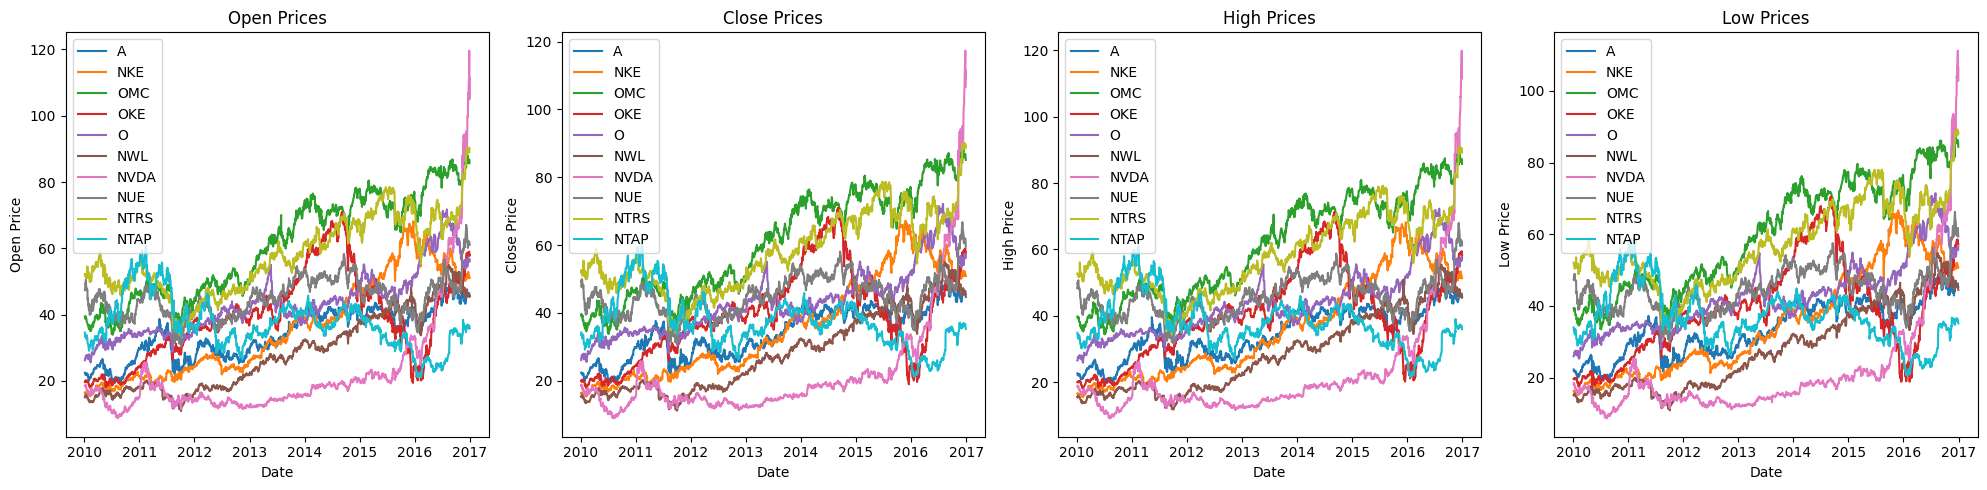

In [10]:
# Function to plot different stock metrics in a single line
def plot_stock_metrics_in_line(data, stocks, metrics):
    num_metrics = len(metrics)
    fig, axs = plt.subplots(1, num_metrics, figsize=(20, 5))  # Adjust figure size for better fit

    for i, metric in enumerate(metrics):
        for stock_name in stocks:
            stock_data = data[data['symbol'] == stock_name]
            axs[i].plot(stock_data.index, stock_data[metric], label=stock_name)
        axs[i].set_title(f'{metric.capitalize()} Prices')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(f'{metric.capitalize()} Price')
        axs[i].legend(loc='best')

    plt.tight_layout()
    plt.show()

# Plot open, close, high, and low for top 10 stocks in a single line
metrics = ['open', 'close', 'high', 'low']
plot_stock_metrics_in_line(prices_split_adjusted, top_10_stocks, metrics)


**Data Preprocessing**

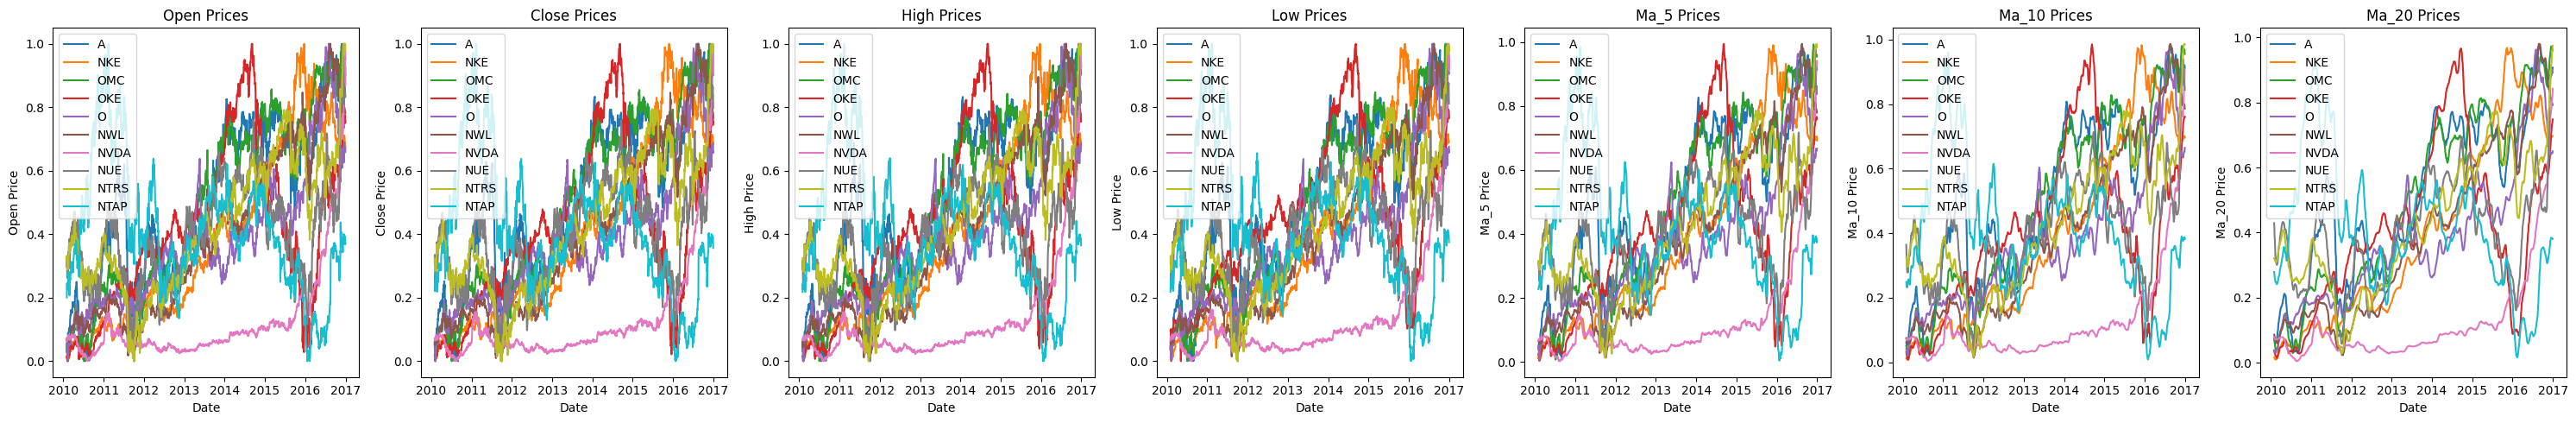

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Function to handle missing values, normalize data, and add moving averages
def preprocess_data(data, stocks):
    # Handle missing values
    handled_data = {}
    for stock_name in stocks:
        stock_data = data[data['symbol'] == stock_name].copy()
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
        handled_data[stock_name] = stock_data

    # Normalize data
    scaler = MinMaxScaler()
    normalized_data = {}
    for stock_name in stocks:
        stock_data = handled_data[stock_name].copy()
        stock_data[['open', 'close', 'high', 'low', 'volume']] = scaler.fit_transform(stock_data[['open', 'close', 'high', 'low', 'volume']])
        normalized_data[stock_name] = stock_data

    # Add moving averages
    ma_data = {}
    for stock_name in stocks:
        stock_data = normalized_data[stock_name].copy()
        stock_data['MA_5'] = stock_data['close'].rolling(window=5).mean()
        stock_data['MA_10'] = stock_data['close'].rolling(window=10).mean()
        stock_data['MA_20'] = stock_data['close'].rolling(window=20).mean()
        stock_data.dropna(inplace=True)
        ma_data[stock_name] = stock_data

    return ma_data

# Function to plot different stock metrics in a single line
def plot_stock_metrics_in_line(data, stocks, metrics):
    num_metrics = len(metrics)
    fig, axs = plt.subplots(1, num_metrics, figsize=(30, 5))  # Adjust figure size for better fit

    for i, metric in enumerate(metrics):
        for stock_name in stocks:
            stock_data = data[stock_name]
            axs[i].plot(stock_data.index, stock_data[metric], label=stock_name)
        axs[i].set_title(f'{metric.capitalize()} Prices')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(f'{metric.capitalize()} Price')
        axs[i].legend(loc='best')

    plt.tight_layout()
    plt.show()



# Preprocess the data (handle missing values, normalize, add moving averages)
preprocessed_data = preprocess_data(prices_split_adjusted, top_10_stocks)

# Define metrics to plot
metrics = ['open', 'close', 'high', 'low', 'MA_5', 'MA_10', 'MA_20']

# Plot all metrics for top 10 stocks in a single line
plot_stock_metrics_in_line(preprocessed_data, top_10_stocks, metrics)


In [14]:
# Function to handle missing values
def handle_missing_values(data, stocks):
    handled_data = {}
    for stock_name in stocks:
        stock_data = data[data['symbol'] == stock_name].copy()
        print(f"Missing values for {stock_name} before handling:")
        print(stock_data.isna().sum())
        stock_data.fillna(method='ffill', inplace=True)
        stock_data.fillna(method='bfill', inplace=True)
        print(f"Missing values for {stock_name} after handling:")
        print(stock_data.isna().sum())
        handled_data[stock_name] = stock_data
    return handled_data

# Apply handling missing values to the data
handled_data = handle_missing_values(prices_split_adjusted, top_10_stocks)


Missing values for A before handling:
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values for A after handling:
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values for NKE before handling:
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values for NKE after handling:
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values for OMC before handling:
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values for OMC after handling:
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values for OKE before handling:
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing values for OKE after handling:
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64
Missing 

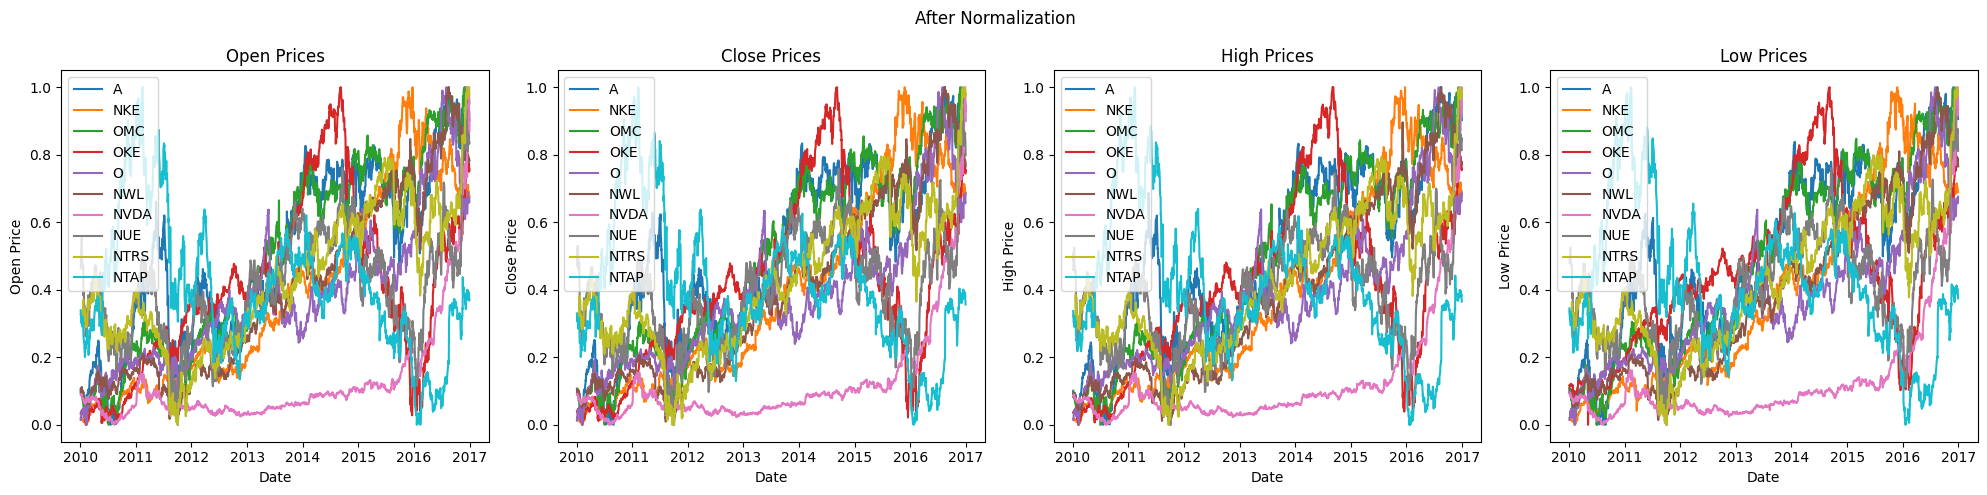

In [19]:
# Function to normalize data
def normalize_data(data, stocks):
    scaler = MinMaxScaler()
    normalized_data = {}
    for stock_name in stocks:
        stock_data = data[stock_name].copy()
        stock_data[['open', 'close', 'high', 'low', 'volume']] = scaler.fit_transform(stock_data[['open', 'close', 'high', 'low', 'volume']])
        normalized_data[stock_name] = stock_data
    return normalized_data

# Function to plot different stock metrics in a single line
def plot_stock_metrics(data, stocks, metrics, title):
    num_metrics = len(metrics)
    fig, axs = plt.subplots(1, num_metrics, figsize=(20, 5))  # Adjust figure size for better fit

    for i, metric in enumerate(metrics):
        for stock_name in stocks:
            stock_data = data[stock_name]
            axs[i].plot(stock_data.index, stock_data[metric], label=stock_name)
        axs[i].set_title(f'{metric.capitalize()} Prices')
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel(f'{metric.capitalize()} Price')
        axs[i].legend(loc='best')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Normalize the data
normalized_data = normalize_data(handled_data, top_10_stocks)


# Plot open, close, high, and low for top 10 stocks after normalization
metrics = ['open', 'close', 'high', 'low']
plot_stock_metrics(normalized_data, top_10_stocks, metrics, 'After Normalization')

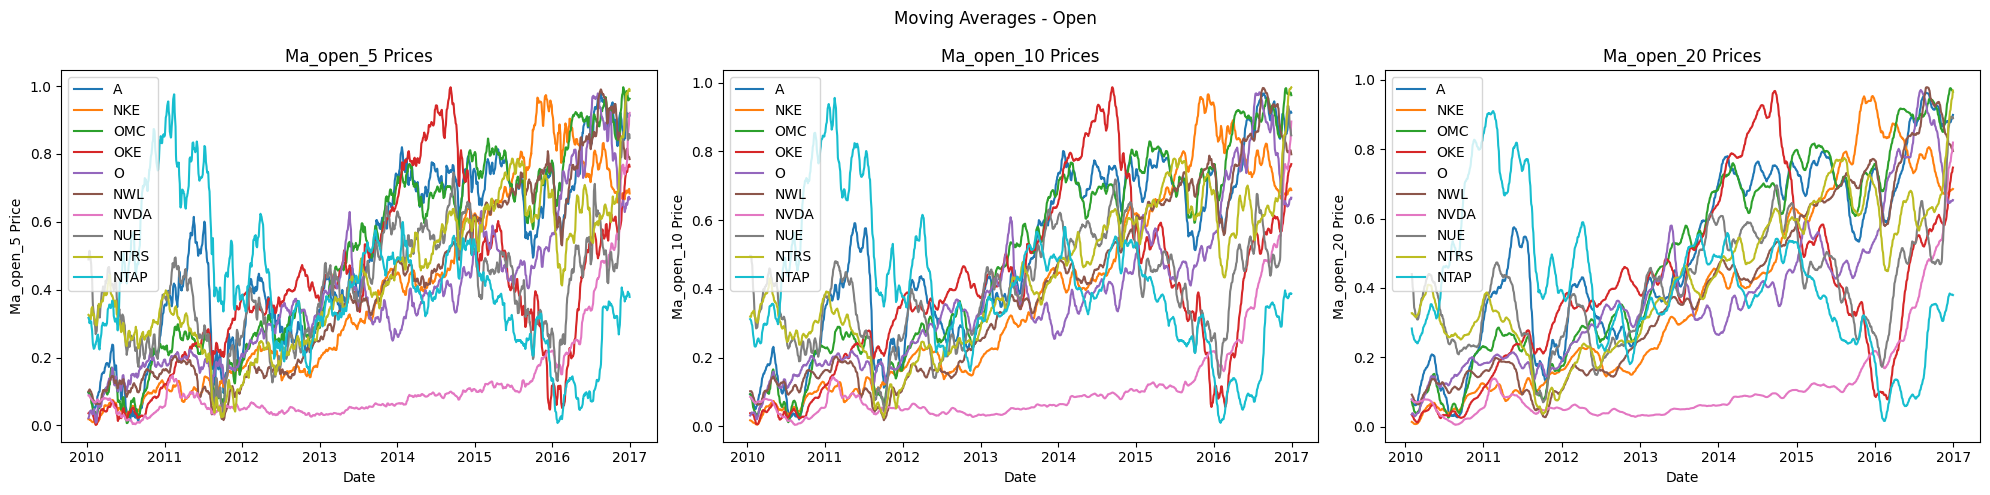

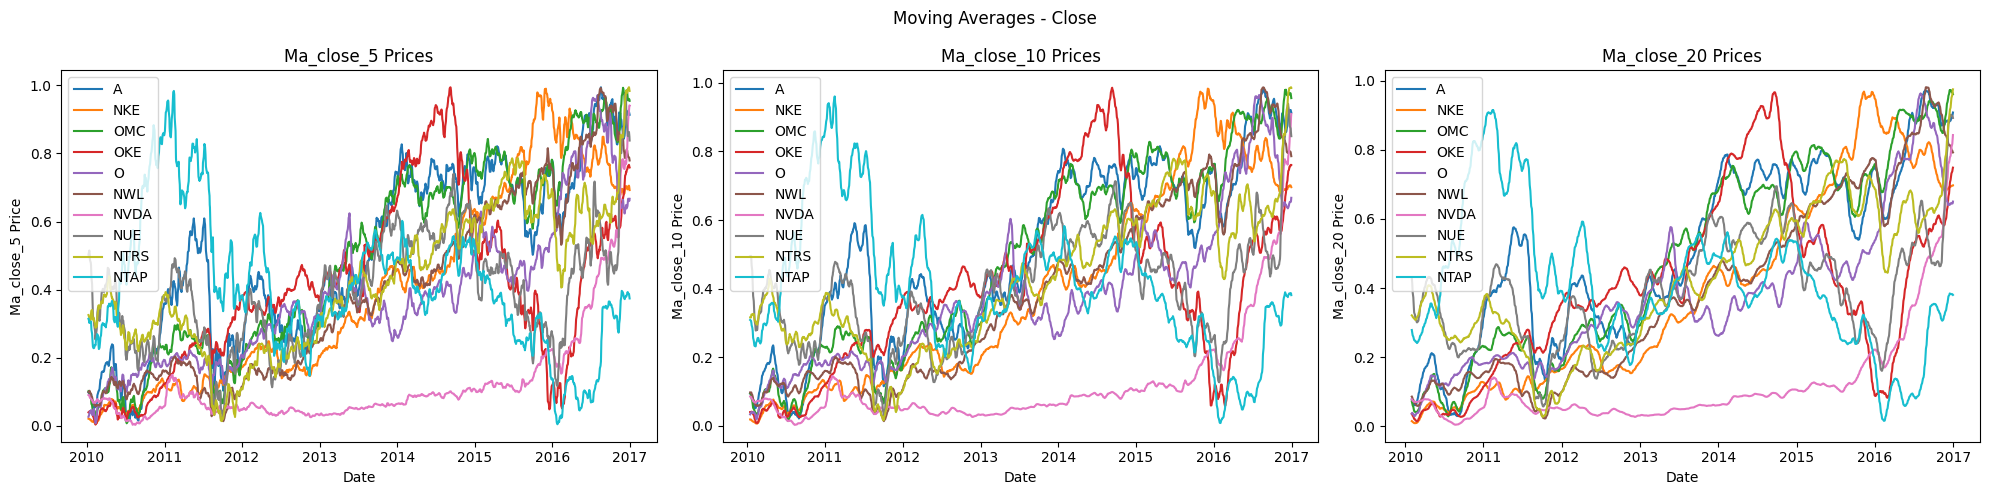

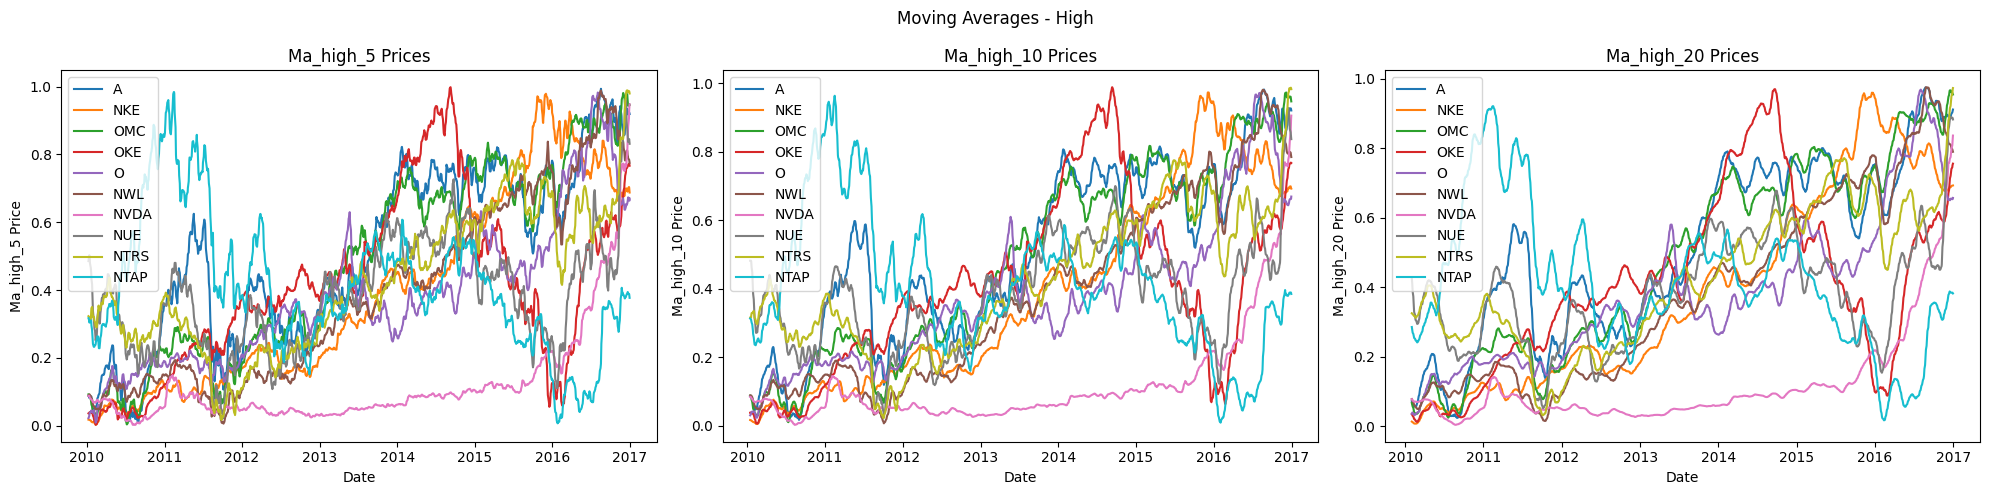

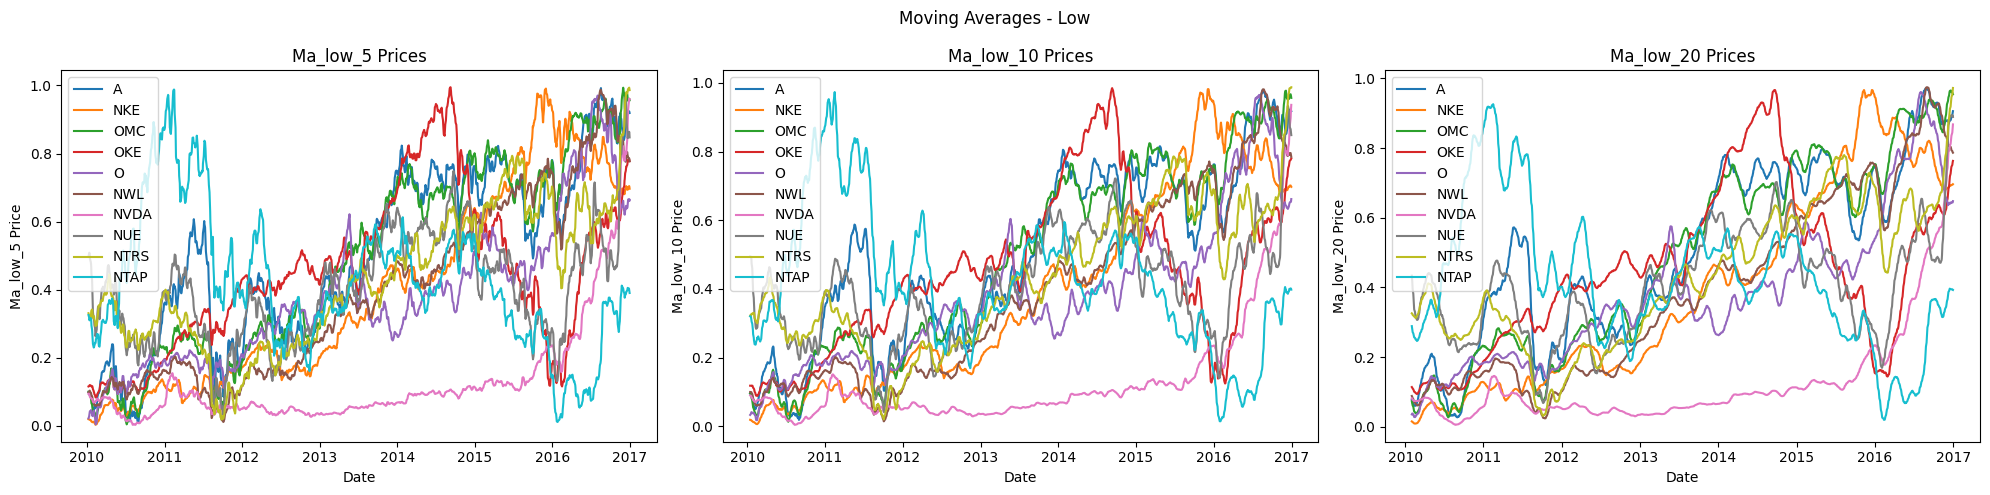

In [22]:
# Add moving averages for open, close, high, and low
def add_moving_averages_all_metrics(data, stocks):
    ma_data = {}
    for stock_name in stocks:
        stock_data = data[stock_name].copy()
        for metric in ['open', 'close', 'high', 'low']:
            stock_data[f'MA_{metric}_5'] = stock_data[metric].rolling(window=5).mean()
            stock_data[f'MA_{metric}_10'] = stock_data[metric].rolling(window=10).mean()
            stock_data[f'MA_{metric}_20'] = stock_data[metric].rolling(window=20).mean()
        ma_data[stock_name] = stock_data
    return ma_data

# Function to plot moving averages for different stock metrics
def plot_moving_averages(data, stocks, metrics):
    for metric in metrics:
        plot_stock_metrics(data, stocks, [f'MA_{metric}_5', f'MA_{metric}_10', f'MA_{metric}_20'], f'Moving Averages - {metric.capitalize()}')

# Add moving averages for open, close, high, and low
ma_data_all_metrics = add_moving_averages_all_metrics(normalized_data, top_10_stocks)

# Plot moving averages for open, close, high, and low
metrics = ['open', 'close', 'high', 'low']
plot_moving_averages(ma_data_all_metrics, top_10_stocks, metrics)


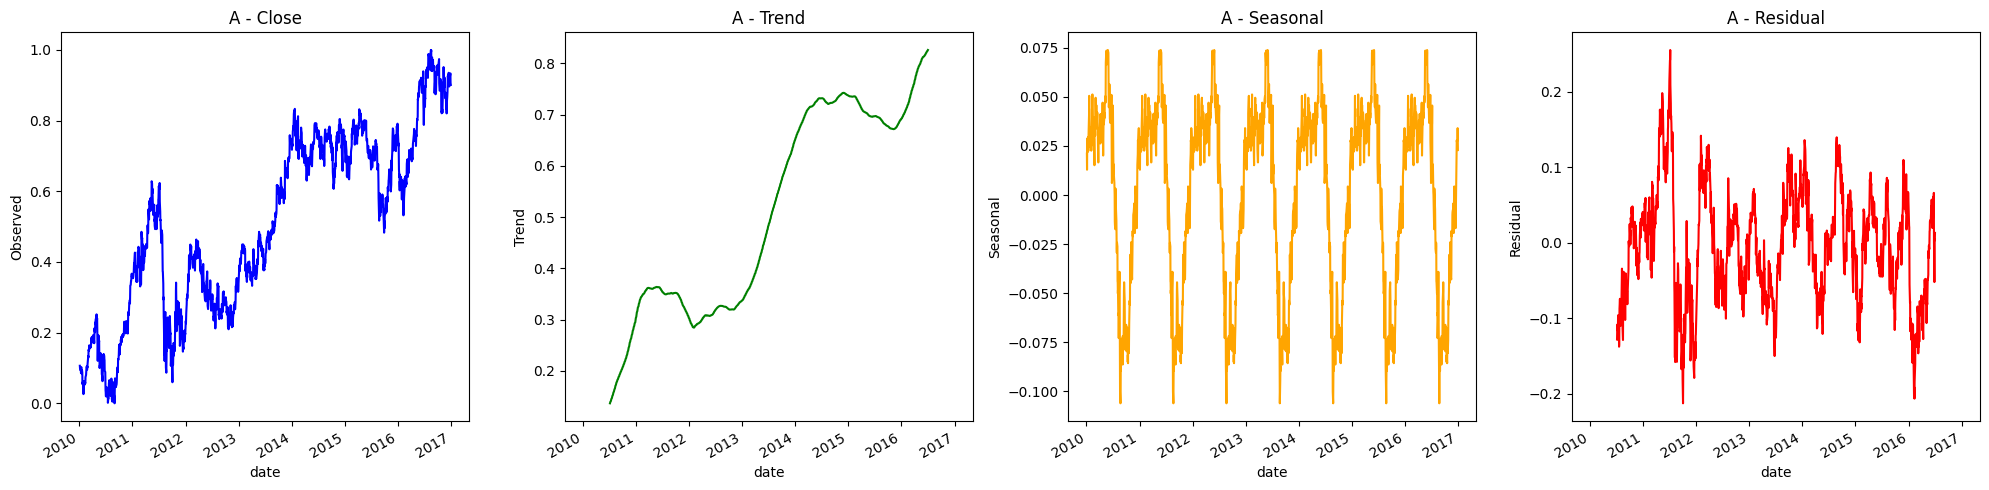

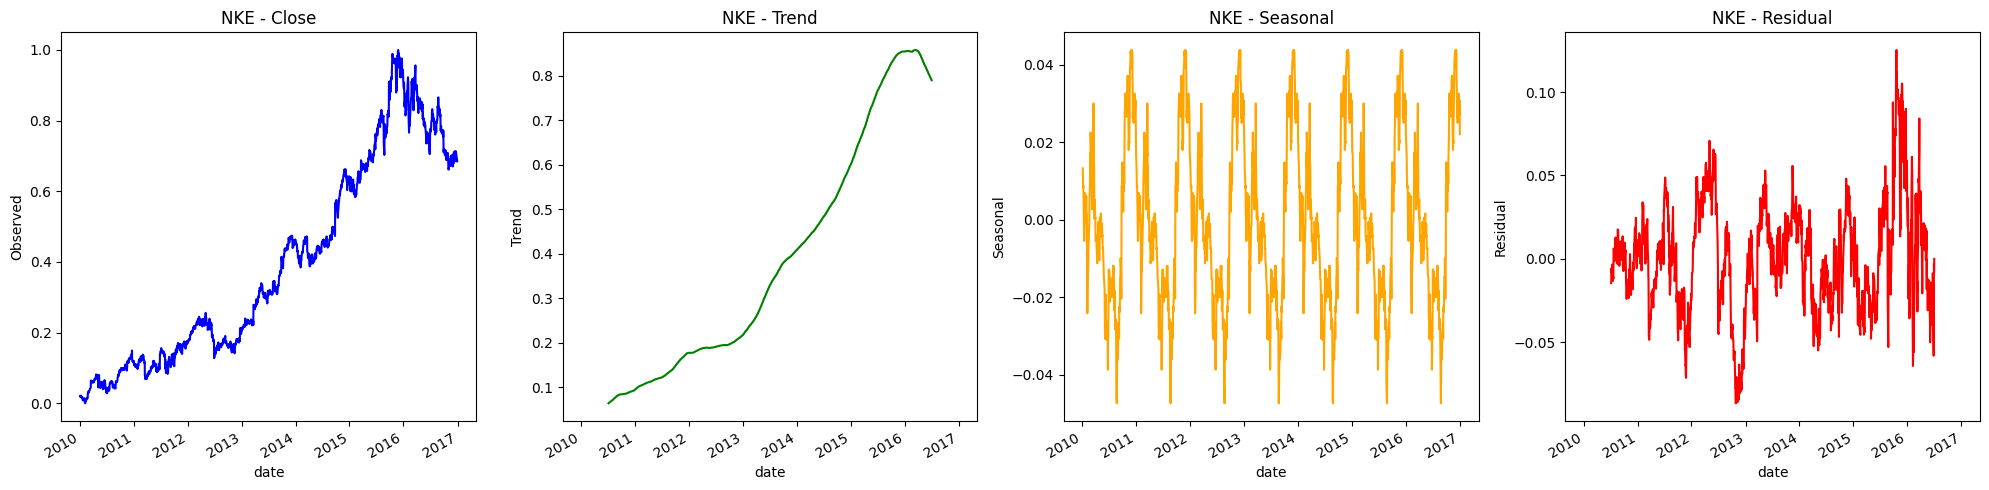

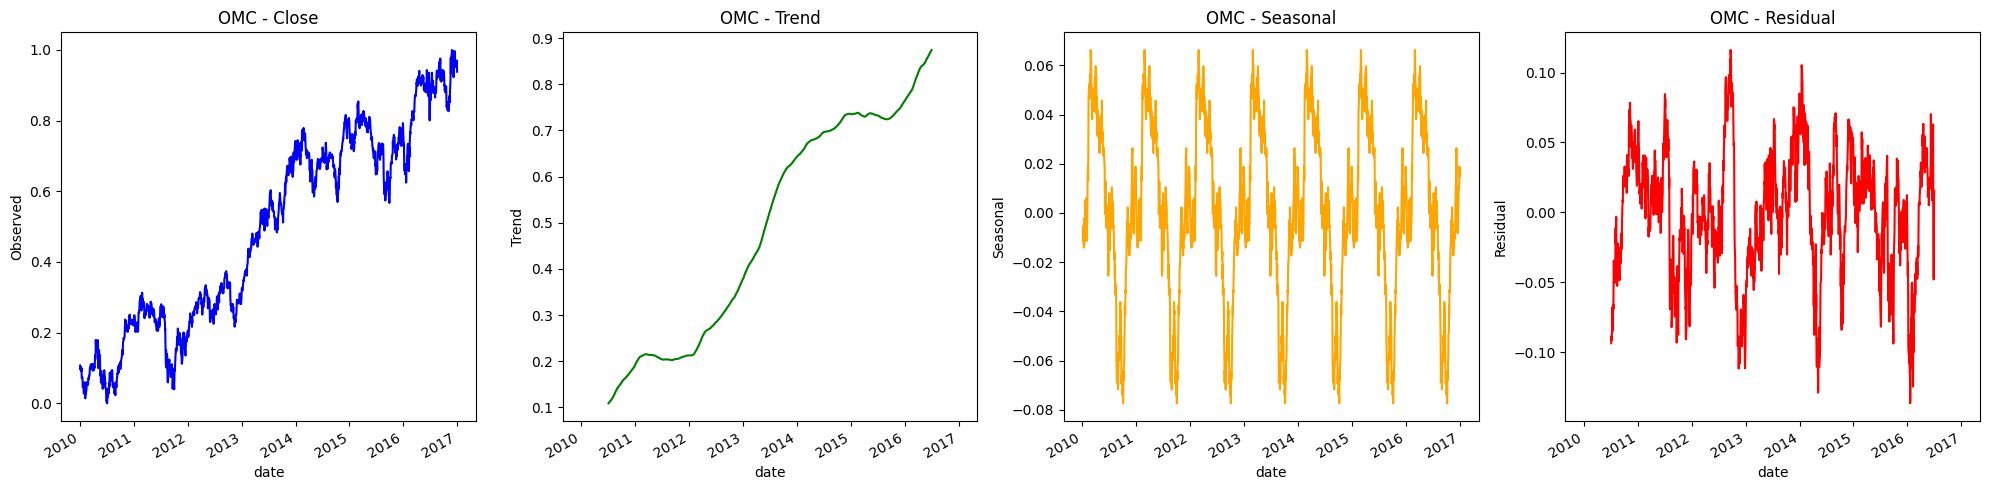

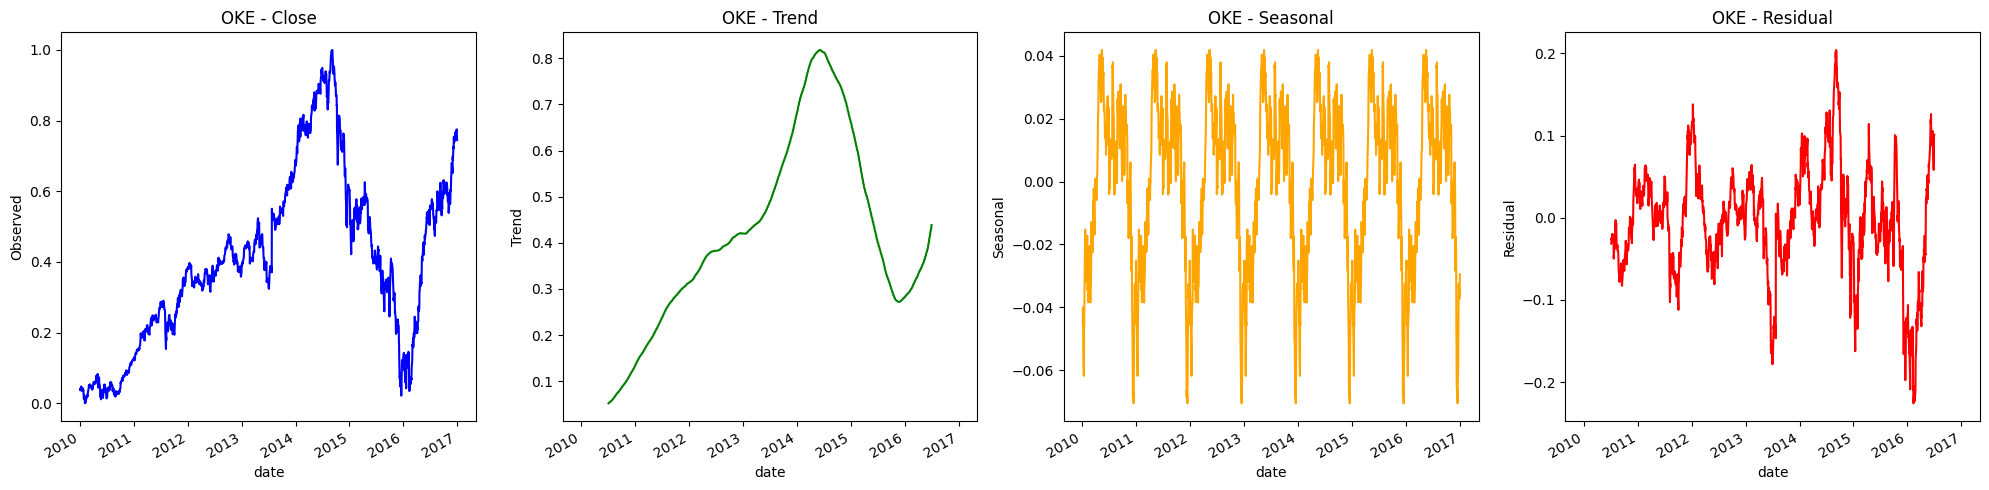

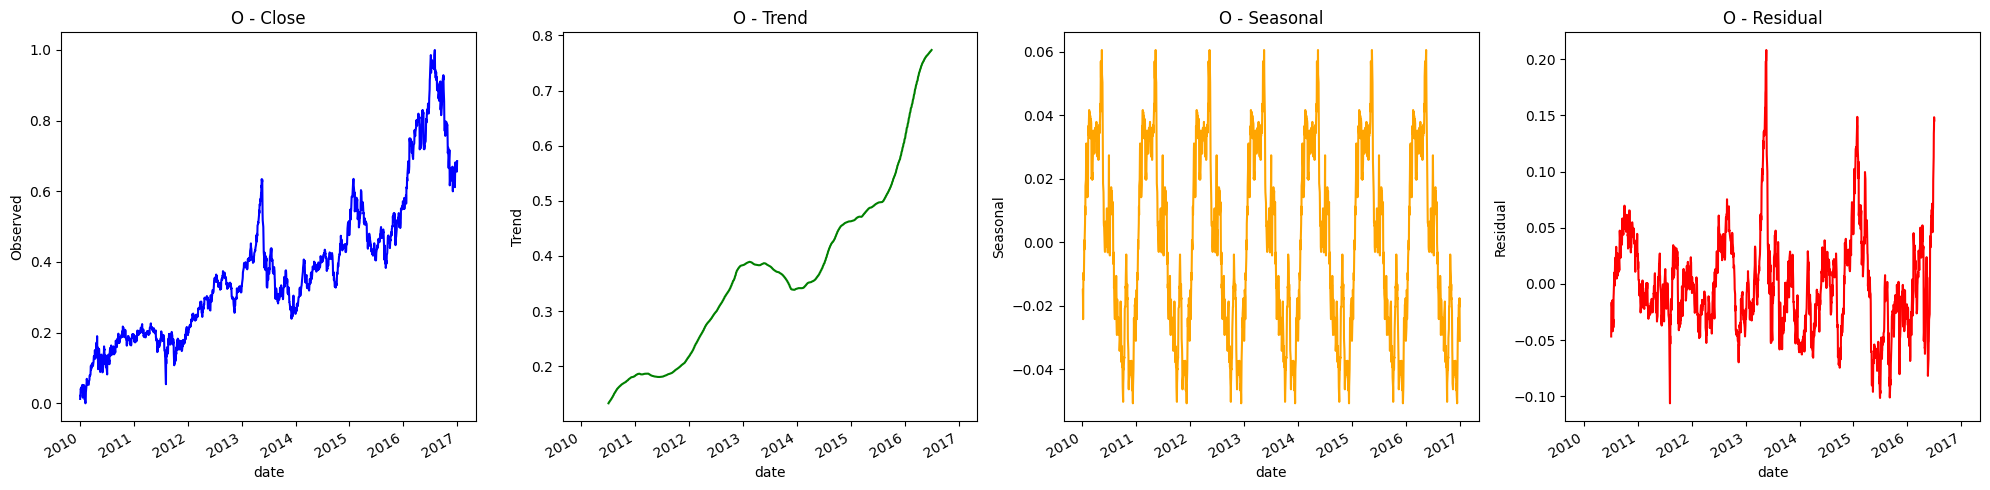

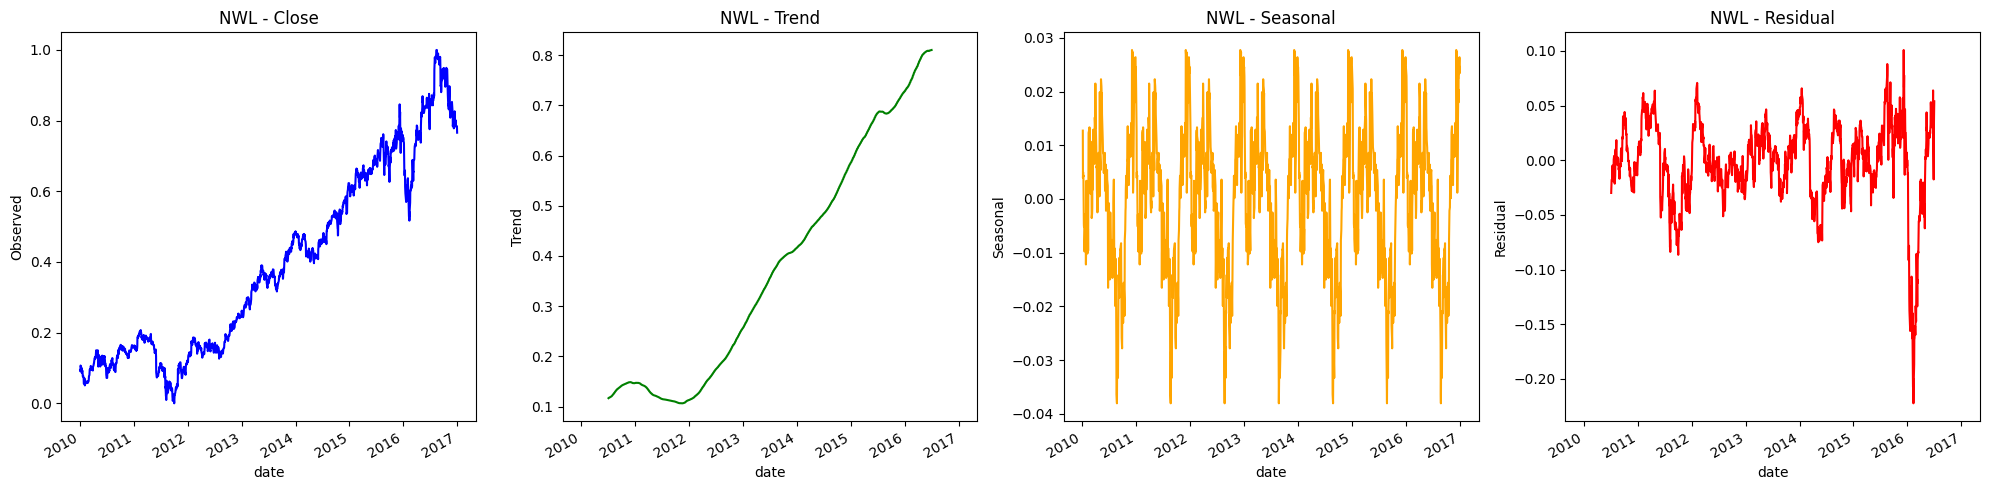

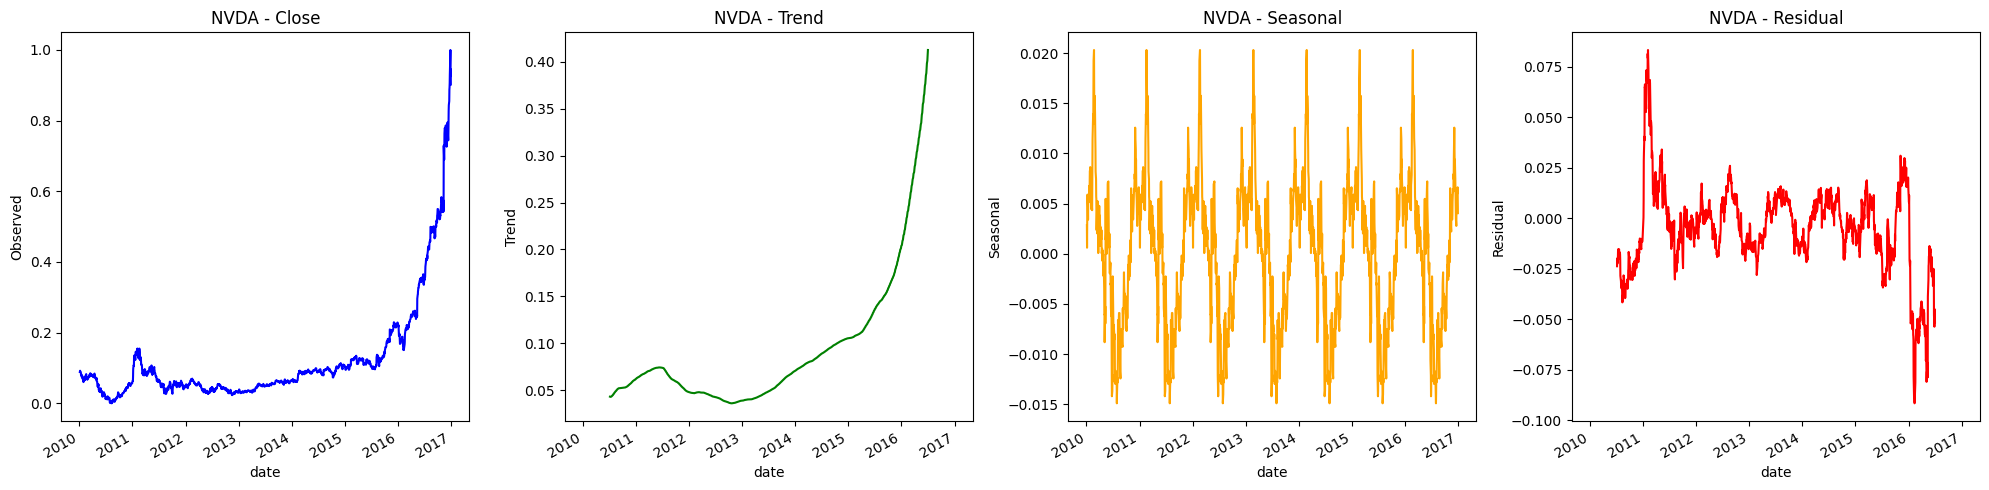

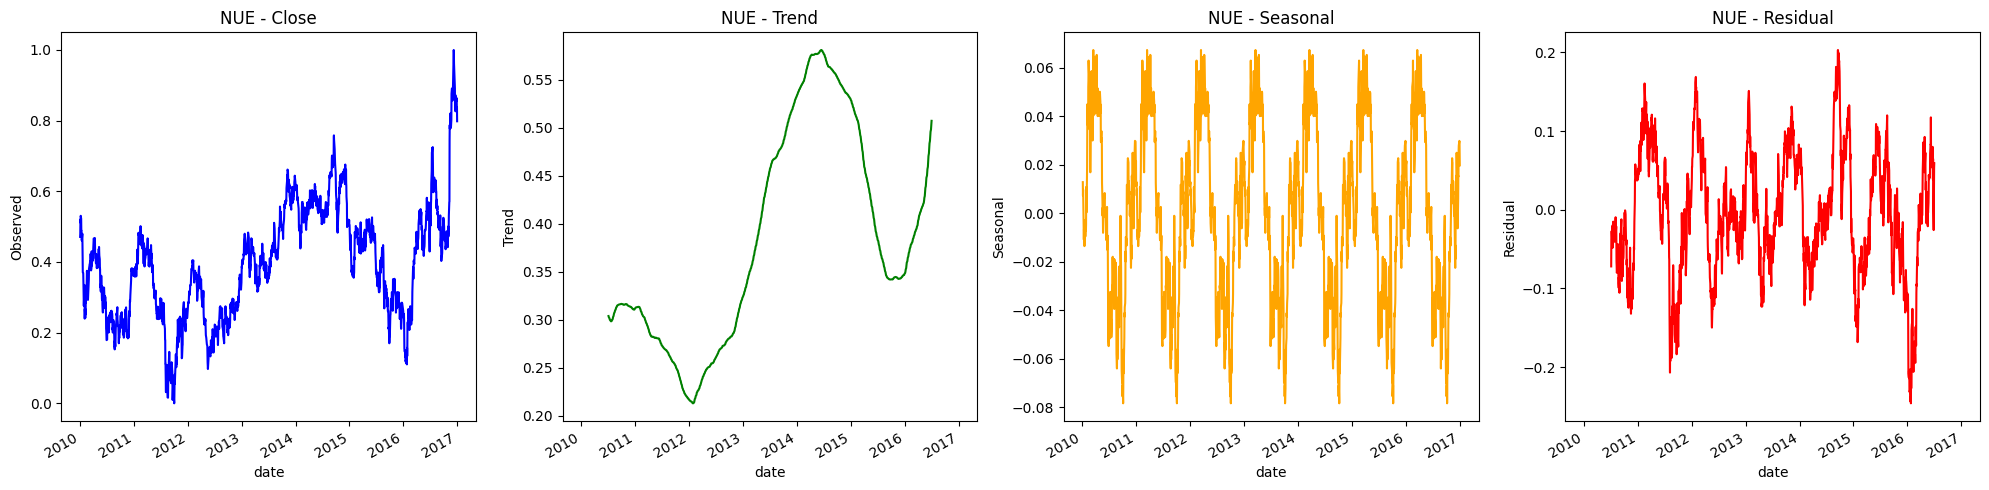

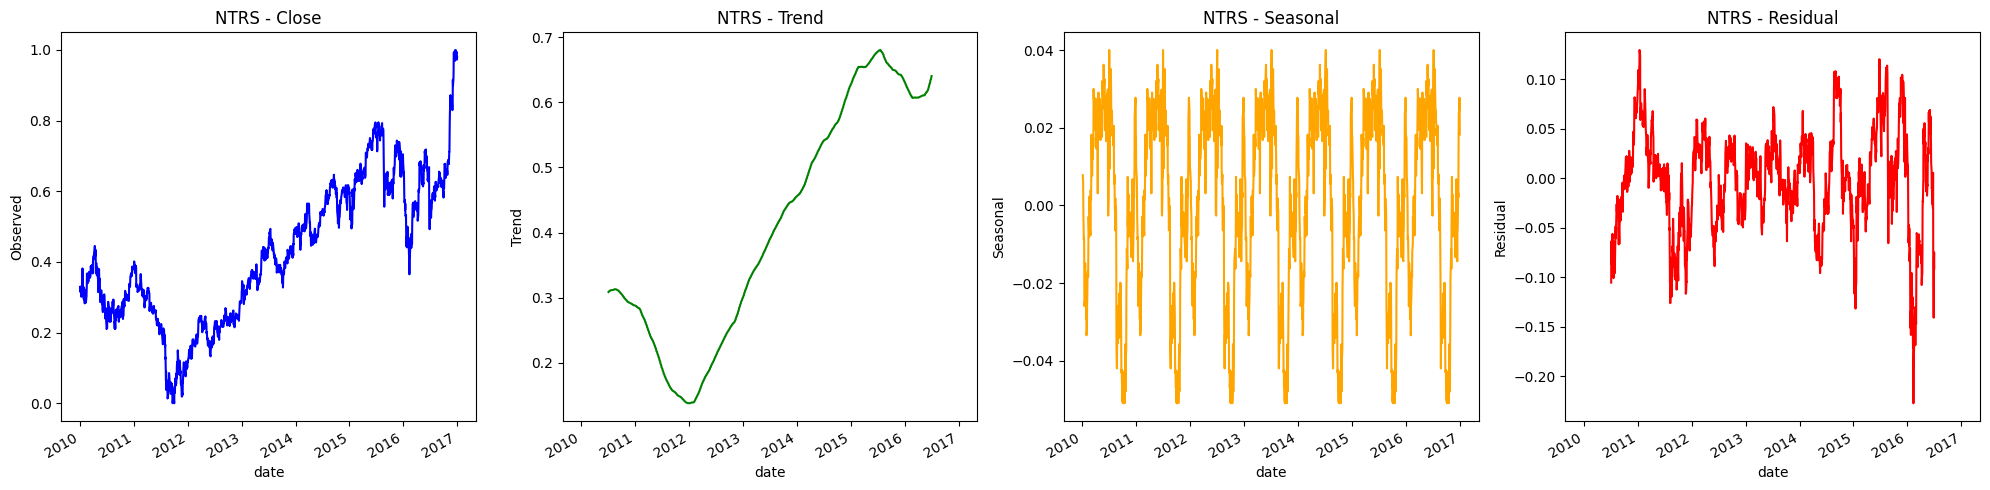

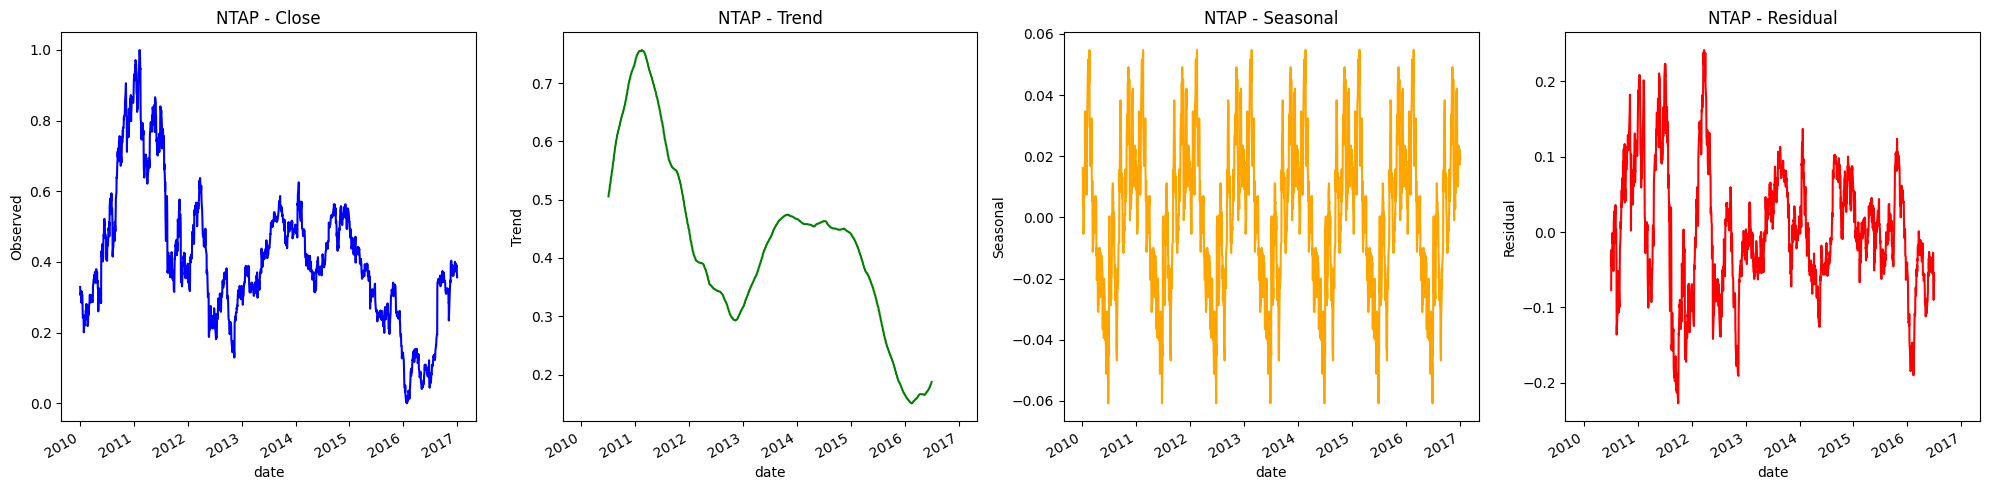

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to decompose time series data and plot in a single row
def decompose_time_series_single_row(data, stock, metric):
    result = seasonal_decompose(data[stock][metric], model='additive', period=252)  # Using a period of 252 trading days
    fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

    result.observed.plot(ax=axs[0], color='blue')
    axs[0].set_ylabel('Observed')
    axs[0].set_title(f'{stock} - {metric.capitalize()}')

    result.trend.plot(ax=axs[1], color='green')
    axs[1].set_ylabel('Trend')
    axs[1].set_title(f'{stock} - Trend')

    result.seasonal.plot(ax=axs[2], color='orange')
    axs[2].set_ylabel('Seasonal')
    axs[2].set_title(f'{stock} - Seasonal')

    result.resid.plot(ax=axs[3], color='red')
    axs[3].set_ylabel('Residual')
    axs[3].set_title(f'{stock} - Residual')

    plt.tight_layout()
    plt.show()

# Decompose the metrics of the top 10 stocks
metrics = ['close']  # Use 'close' as the metric for simplicity

for stock_name in top_10_stocks:
    for metric in metrics:
        decompose_time_series_single_row(normalized_data, stock_name, metric)
